<a href="https://colab.research.google.com/github/joeymaillette04/ToyotaCV/blob/AdaptiveMeanThresholding/firstiteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


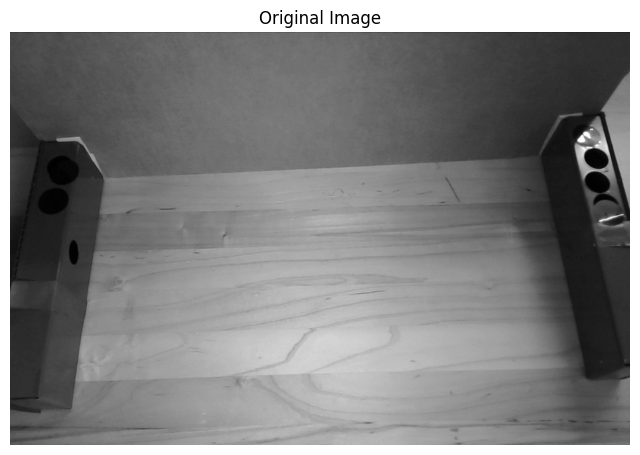

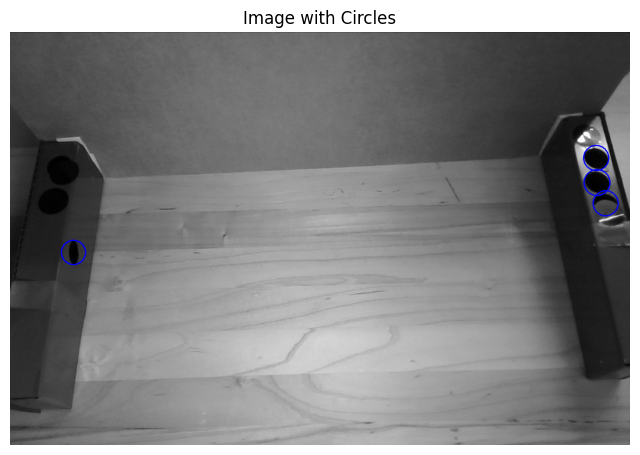

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Get the image
    img = getImgObject("Red", "6_some_holes_covered.jpg", "GRAYSCALE")
    if img is None:
        print("Image not loaded")
        return

    # Apply adaptive thresholding
    img_bin = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 5)

    # Perform morphological operations (erosion and dilation)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)

    # Find contours in the binary image
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Prepare a color version of the image for visualization
    img_color = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), cv2.COLOR_BGR2RGB)

    # Loop through the contours and filter based on area, intensity, and color
    for cnt in contours:
        # Calculate the contour area
        area = cv2.contourArea(cnt)

        # Calculate the average intensity within the contour region
        mask = np.zeros_like(img)
        cv2.drawContours(mask, [cnt], 0, 255, -1)
        avg_intensity = np.mean(img[mask > 0])

        # Set the thresholds for area, intensity, and color
        area_threshold = 500
        intensity_threshold = 30
        color_threshold = 50

        # Calculate the average color within the contour region
        avg_color = np.mean(img_color[mask > 0], axis=0)

        # If the contour satisfies the area, intensity, and color thresholds, draw a circle
        if area > area_threshold and avg_intensity < intensity_threshold and avg_color[0] < color_threshold:
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)
            cv2.circle(img_color, center, radius, (0, 0, 255), 2)

    # Display the original image and the result with circles around the dark spots
    displayImage(img, "Original Image", True)
    displayImage(img_color, "Image with Circles", False)


def getImgObject(folder, file, imaging):
    path = '/content/gdrive/My Drive/ToyotaChallenge/Training Images/' + folder + "/" + file

    if imaging == "RGB":
        img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    elif imaging == "GRAYSCALE":
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    else:
        gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        _, img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return img


def displayImage(img, title, is_gray):
    plt.figure(figsize=(8, 8))
    if is_gray:
        plt.imshow(img, cmap="gray")
    else:
        plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()


main()